### NEURAL NETWORKS, Lab2 Perceptron and Logistic Neuron

## Excercise 1
Generate the following datasets. Check how they look like. Try to plot the 2-dimensional data (dataset_X)

In [112]:
import numpy as np
import math
import matplotlib.pyplot as plt

#sigmoid function
def sigmoid(x):
    return 1.0/(1.0+math.exp(-x))

#number of data elements
N=50

#vector of N random numbers
rr = np.random.rand(N)


w_small = np.array([1,1])
bias_small = -1

#number of dimensions for bigger dataset
d=10

w_big = np.random.rand(10)
bias_big = -1.5



#2D data set
dataset_X  = np.random.rand(N,2)
dataset_linear_Y = np.array([1 if (np.dot(w_small,i)+bias_small)>=0 else -1 for i in dataset_X])
dataset_mixed_Y = np.array([1 if sigmoid(10*(np.dot(w_small,i[0])+bias_small))>i[1] else -1 for i in zip(dataset_X,rr)])

#10D data set
dataset_10_X = np.random.rand(N,d)
dataset_linear_10_Y = np.array([1 if (np.dot(w_big,i)+bias_big)>=0 else -1 for i in dataset_10_X])
dataset_mixed_10_Y = np.array([1 if sigmoid(10*(np.dot(w_big,i[0])+bias_big))>i[1] else -1 for i in zip(dataset_10_X,rr)])


In [113]:
#YOUR CODE HERE
def plotdata(labels, w, b, model=None):
    pluses = dataset_X[labels==1]
    minuses = dataset_X[labels==-1]
    plt.scatter(pluses[:,0], pluses[:,1], c='red')
    plt.scatter(minuses[:,0], minuses[:,1], c='green')
    x1grid = np.linspace(0, 1, 10)
    x2grid = (-b - w[0]*x1grid)/w[1]
    plt.plot(x1grid, x2grid, c='blue')
    if model is not None:
        x2grid = (-model.b - model.w[0]*x1grid)/model.w[1]
        plt.plot(x1grid, x2grid, c='blue')


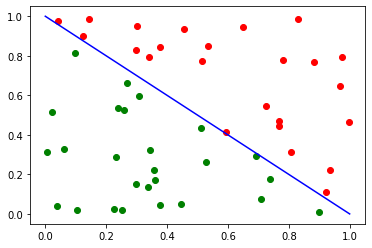

In [114]:
plotdata(dataset_linear_Y, w_small, bias_small)

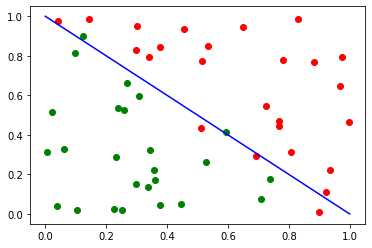

In [115]:
plotdata(dataset_mixed_Y, w_small, bias_small)

## Excercise 2
Please, implement the Perceptron, using numpy package

In [116]:
class Perceptron:

    #pass

    #use __init__(self,d) function to construct the Perceptron object (d - number of dimensions) and to set the starting values of weights and bias
    
    def __init__(self, d):
        self.d = d
        self.w = np.random.rand(d)-0.5
        self.b = np.random.rand()
        self.history = []
        
    def signal(self, x):
        return np.dot(self.w, x)+self.b
    
    #implement a function accepting a dataset as a parameter and updating the weights and bias of the perceptron for all elelements. 
    #The function should return the error made in current iteration
    
    def one_iter(self, dataX, dataY):
        error = 0
        for i in range(dataY.size):
            if dataY[i]*self.signal(dataX[i]) <= 0.0:
                error = error + 1
                self.w = self.w + dataY[i]*dataX[i]
                self.b = self.b + dataY[i]
        return error / dataY.size  
    
    def test(self, dataX, dataY):
        error = 0
        for i in range(dataY.size):
            if dataY[i]*self.signal(dataX[i]) <= 0.0:
                error = error + 1
        return error / dataY.size
    
    #implement a function running the above function in a while loop until the error is below a given threshold. 
    #Returns the list of errors made in subsequent iterations
    
    def learn(self, dataX, dataY, tol, maxiter):
        error = 1.0
        iterr = 0
        while error >= tol and iterr < maxiter:
            error = self.one_iter(dataX, dataY)
            self.history.append(error)
            iterr = iterr+1
        return self.history
            

## Excercise 3
1.Split each of the datasets into two subsets: training and testing

2.Train the perceptron on the training parts of datasets:
    a) (dataset_X, dataset_linear_Y),
    b), (dataset_X, dataset_mixed_Y)
    
3.Plot how the training and testing error changes during the learning process (using matplotlib)

4.Plot the data and the resulting decision line (matplotlib)

[0.45, 0.25, 0.1, 0.1, 0.1, 0.225, 0.15, 0.1, 0.1, 0.075, 0.125, 0.025]


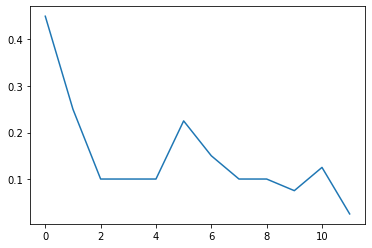

In [117]:
# YOUR CODE HERE
dataset_X_train = dataset_X[:40]
dataset_X_test = dataset_X[40:]
dataset_linear_Y_train = dataset_linear_Y[:40]
dataset_linear_Y_test = dataset_linear_Y[40:]
dataset_mixed_Y_train = dataset_mixed_Y[:40]
dataset_mixed_Y_test = dataset_mixed_Y[40:]

p1 = Perceptron(2)

h1 = p1.learn(dataset_X_train, dataset_linear_Y_train, 0.05, 100)

print(h1)
plt.plot(h1)

[0.375, 0.35, 0.175, 0.15, 0.325, 0.15, 0.2, 0.2, 0.15, 0.15, 0.1]


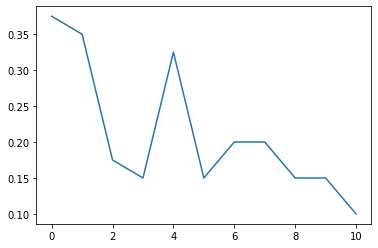

In [118]:
p2 = Perceptron(2)

h2 = p2.learn(dataset_X_train, dataset_mixed_Y_train, 0.15, 100)

print(h2)
plt.plot(h2)

In [119]:
p1.test(dataset_X_test, dataset_linear_Y_test)

0.0

In [120]:
p2.test(dataset_X_test, dataset_mixed_Y_test)

0.1

## Excercise 4
Repeat the Excercise 3 for datasets: a) (dataset_10_X,dataset_linear_10_Y), b) (dataset_10_X, dataset_mixed_10_Y), without point 4.

In [121]:
#YOUR CODE HERE
dataset_10_X_train = dataset_10_X[:40]
dataset_10_X_test = dataset_10_X[40:]
dataset_linear_10_Y_train = dataset_linear_10_Y[:40]
dataset_linear_10_Y_test = dataset_linear_10_Y[40:]
dataset_mixed_10_Y_train = dataset_mixed_10_Y[:40]
dataset_mixed_10_Y_test = dataset_mixed_10_Y[40:]

p3 = Perceptron(10)
p4 = Perceptron(10)

h3 = p3.learn(dataset_10_X_train, dataset_linear_10_Y_train, 0.01, 100)
print(h3)

h4 = p4.learn(dataset_10_X_train, dataset_mixed_10_Y_train, 0.01, 100)
print(h4)

[0.05, 0.05, 0.05, 0.0]
[0.05, 0.0]


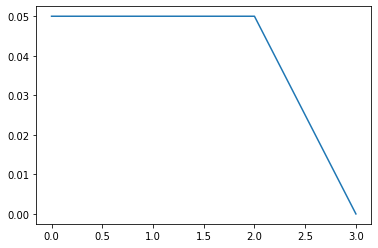

In [122]:
plt.plot(h3)

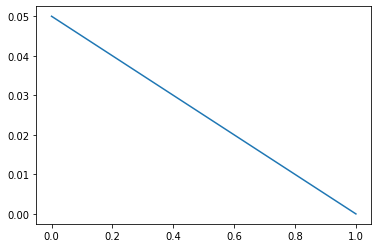

In [123]:
plt.plot(h4)

In [124]:
p3.test(dataset_10_X_test, dataset_linear_10_Y_test)

0.0

In [126]:
p4.test(dataset_10_X_test, dataset_mixed_10_Y_test)

0.0

## Excercise 5
Import the Perceptron (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html?highlight=perceptron#sklearn.linear_model.Perceptron) from the Scikit-learn library. Train on the same datasets and compare the results with those obtained using your hand-made neurons

In [132]:
# YOUR CODE HERE

from sklearn.linear_model import Perceptron

perp1 = Perceptron(alpha=0.0)
perp2 = Perceptron(alpha=0.0)
perp3 = Perceptron(alpha=0.0)
perp4 = Perceptron(alpha=0.0)

perp1.fit(dataset_X_train, dataset_linear_Y_train)
perp2.fit(dataset_X_train, dataset_mixed_Y_train)
perp3.fit(dataset_10_X_train, dataset_linear_10_Y_train)
perp4.fit(dataset_10_X_train, dataset_mixed_10_Y_train)

print(perp1.score(dataset_X_test, dataset_linear_Y_test))
print(perp2.score(dataset_X_test, dataset_mixed_Y_test))
print(perp3.score(dataset_10_X_test, dataset_linear_10_Y_test))
print(perp4.score(dataset_10_X_test, dataset_mixed_10_Y_test))

0.8
0.9
1.0
1.0


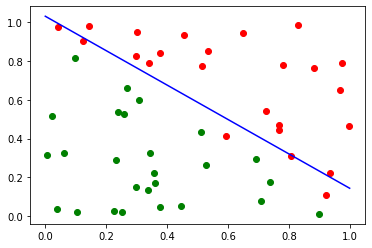

In [134]:
plotdata(dataset_linear_Y, perp1.coef_[0], perp1.intercept_[0])

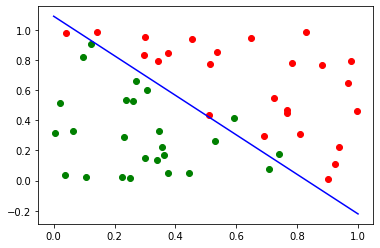

In [135]:
plotdata(dataset_mixed_Y, perp2.coef_[0], perp2.intercept_[0])

## Excercise 6

Try all the excercises with the Logistic Neuron (logistic regression)

In [136]:
#YOUR CODE HERE

from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()
lr2 = LogisticRegression()
lr3 = LogisticRegression()
lr4 = LogisticRegression()

lr1.fit(dataset_X_train, dataset_linear_Y_train)
lr2.fit(dataset_X_train, dataset_mixed_Y_train)
lr3.fit(dataset_10_X_train, dataset_linear_10_Y_train)
lr4.fit(dataset_10_X_train, dataset_mixed_10_Y_train)

print(lr1.score(dataset_X_test, dataset_linear_Y_test))
print(lr2.score(dataset_X_test, dataset_mixed_Y_test))
print(lr3.score(dataset_10_X_test, dataset_linear_10_Y_test))
print(lr4.score(dataset_10_X_test, dataset_mixed_10_Y_test))

1.0
0.9
1.0
1.0


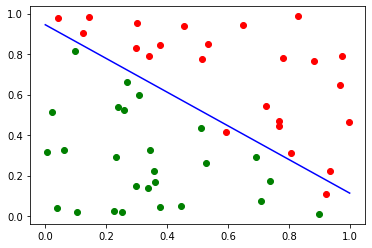

In [137]:
plotdata(dataset_linear_Y, lr1.coef_[0], lr1.intercept_[0])

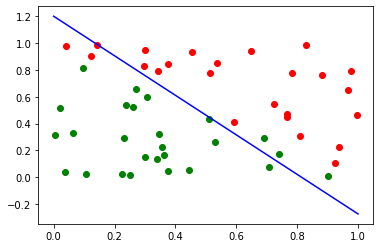

In [138]:
plotdata(dataset_linear_Y, lr2.coef_[0], lr2.intercept_[0])